<a href="https://colab.research.google.com/github/BrnCode/Analise-de-dados-Covid-19/blob/main/Evolu%C3%A7%C3%A3o_Corona_V%C3%ADrus_2019_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go

In [6]:
dataset_df = pd.read_csv('covid_19_data.csv')
dataset_df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [7]:
dataset_df.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

limpando os nomes das colunas

In [8]:
import re 

def corrige_coluna(col_name):
    return re.sub(r"[/| ]", "", col_name).lower()

In [9]:
dataset_df.columns = [corrige_coluna(col) for col in dataset_df.columns]

In [10]:
dataset_df.head()

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


# Olhando para os dados do Brasil

In [11]:
dataset_df.countryregion.unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

In [12]:
dataset_df.loc[dataset_df.countryregion == 'Brazil'] # Selecionando os dados do Brasil

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
82,83,01/23/2020,NaN,Brazil,1/23/20 17:00,0.0,0.0,0.0
2455,2456,02/26/2020,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
2559,2560,02/27/2020,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
2668,2669,02/28/2020,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
2776,2777,02/29/2020,NaN,Brazil,2020-02-29T21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24850,24851,05/15/2020,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,05/16/2020,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,05/17/2020,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,05/18/2020,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


In [13]:
brasil = dataset_df.loc[
        (dataset_df.countryregion == 'Brazil')&
        (dataset_df.confirmed > 0)
        ] 

In [14]:
brasil.head()

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
2455,2456,02/26/2020,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
2559,2560,02/27/2020,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
2668,2669,02/28/2020,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
2776,2777,02/29/2020,NaN,Brazil,2020-02-29T21:03:05,2.0,0.0,0.0
2903,2904,03/01/2020,NaN,Brazil,2020-02-29T21:03:05,2.0,0.0,0.0


Grafico da evolução de casos confirmados

In [15]:
px.line(brasil, "observationdate", "confirmed", title= "Casos Confirmados no Brasil")

Grafico novos casos por dia

In [16]:
 #técnica de programação funcional (map, lambda)
 brasil['novos_casos'] = list(map(
     lambda x: 0 if (x==0) else brasil['confirmed'].iloc[x] - brasil['confirmed'].iloc[x-1],
     np.arange(brasil.shape[0])
 ))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
brasil

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered,novos_casos
2455,2456,02/26/2020,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0,0.0
2559,2560,02/27/2020,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0,0.0
2668,2669,02/28/2020,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0,0.0
2776,2777,02/29/2020,NaN,Brazil,2020-02-29T21:03:05,2.0,0.0,0.0,1.0
2903,2904,03/01/2020,NaN,Brazil,2020-02-29T21:03:05,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
24850,24851,05/15/2020,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0,17126.0
25227,25228,05/16/2020,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0,13220.0
25604,25605,05/17/2020,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0,7569.0
25981,25982,05/18/2020,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0,14288.0


In [18]:
px.line(brasil, x='observationdate', y='novos_casos', title='Novos Casos de Covid-19 por dia')

Grafico das Mortes

In [19]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=brasil.observationdate, y=brasil.deaths, name='Mortes',
               mode='lines+markers', line={'color': 'red'})
)
#Layout
fig.update_layout(title='Mortes por Covid-19 no Brasil')

fig.show()

# Taxa de Crescimento (Séries temporais)

taxa_crescimento = (presente/passado)**(1/n) - 1, onde n = numero de dias

In [20]:
#@title Texto de título padrão
def taxa_crescimento(data, variable, data_inicio=None, data_fim=None): 
    #data inicio e data fim pegando respectivamente a primeira data e a ultima
    if data_inicio == None:
        data_inicio = data.observationdate.loc[data[variable] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
     
    if data_fim == None:
        data_fim = data.observationdate.iloc[-1]
    else:
        data_fim = pd.to_datetime(data_fim)

    # Definindo presente e passado

    passado = data.loc[data.observationdate == data_inicio, variable].values[0]
    presente = data.loc[data.observationdate == data_fim, variable].values[0]

    # Definindo numero de pontos avaliados
    n = (pd.to_datetime(data_fim) - pd.to_datetime(data_inicio)).days #transformando as data fim e inicio em tipo datetime

    #calcular  a taxa
    taxa = float(((presente/passado)**(1/n))- 1)

    return taxa * 100 #retornar porcentagem


Taxa de crescimento médio do COVID no Brasil em todo o périodo do dataset

In [21]:
taxa_crescimento(brasil, 'confirmed') #Taxa média de todo o periodo

16.27183353112116

In [22]:
def taxa_crescimento_diario(data, variable, data_inicio=None):
    if data_inicio == None:
         data_inicio = data.observationdate.loc[data[variable] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)

    data_fim = data.observationdate.max()
      
    # Definindo numero de pontos avaliados
    n = (pd.to_datetime(data_fim) - pd.to_datetime(data_inicio)).days #transformando as data fim e inicio em tipo datetime

    # Taxa de um dia para o outro
    taxas = list(map(
        lambda x: (data[variable].iloc[x] - data[variable].iloc[x-1]) / data[variable].iloc[x-1],
        range(1, n+1)
    ))
    return np.array(taxas) * 100

In [23]:
tx_dia = taxa_crescimento_diario(brasil, 'confirmed')

In [24]:
tx_dia

array([  0.        ,   0.        , 100.        ,   0.        ,
         0.        ,   0.        , 100.        ,   0.        ,
       225.        ,   0.        ,  53.84615385,  25.        ,
        24.        ,  22.58064516,  36.84210526, 190.38461538,
         0.        ,   7.28476821,  23.45679012,  60.5       ,
        15.88785047,  66.93548387,  27.69726248,  28.75157629,
        51.4201763 ,  24.45019405,  16.78794179,  13.66266133,
        16.87548943,  14.47236181,  14.25226807,   9.01639344,
         7.58928571,  24.8525879 ,  19.57320273,  17.67115272,
        12.58080557,  14.39929329,   7.43243243,   9.26325247,
        15.40169394,  15.22017956,  11.88620903,   8.54521335,
         5.54537122,   7.06807546,   5.57858688,   7.81903542,
        12.10513815,   7.4329096 ,  10.70501233,   8.83557983,
         5.44492335,   5.4043566 ,   5.73350023,   6.21648599,
         9.35157462,   8.00823407,   9.77184834,   6.36504619,
         6.88748019,   8.58316283,   8.80726429,   9.41

In [25]:
primeiro_dia = brasil.observationdate.loc[brasil.confirmed > 0].min()

px.line(x = pd.date_range(primeiro_dia, brasil.observationdate.max())[1:],
        y=tx_dia, title='Taxa de Crescimento de Casos Confirmados no Brasil')

# Predições

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [ ]:
casos_confirmados = brasil.confirmed
casos_confirmados.index = brasil.observationdate
casos_confirmados

In [37]:
decomp = seasonal_decompose(casos_confirmados, period=7)

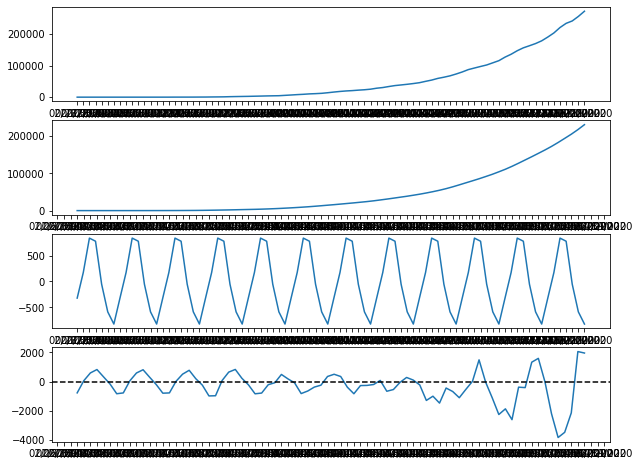

In [38]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,8))

ax1.plot(decomp.observed)
ax2.plot(decomp.trend)
ax3.plot(decomp.seasonal)
ax4.plot(casos_confirmados.index, decomp.resid)
ax4.axhline(0, linestyle='dashed', c='black')

plt.show()

## ARIMA (Média movel integrada autoregressiva)

In [39]:
!pip install pmdarima

In [40]:
from pmdarima.arima import auto_arima

In [41]:
modelo = auto_arima(casos_confirmados)

In [43]:
fig = go.Figure(go.Scatter(
    x=casos_confirmados.index, y=casos_confirmados, name="Observados"
))

fig.add_trace(go.Scatter(
    x=casos_confirmados.index, y=modelo.predict_in_sample(), name='Preditos'
))

fig.add_trace(go.Scatter(
    x=pd.date_range('2020-05-20', '2020-06-20'), y=modelo.predict(31), name='Forecast'
))

fig.update_layout(title='Previsão de Casos confirmados no Brasil para os proximos 30 dias')

## Modelo de Crescimento

In [44]:
from fbprophet import Prophet

### Pré processamento

In [61]:
# Separando grupo de treino e teste
train = casos_confirmados.reset_index()[:-5]
test = casos_confirmados.reset_index()[-5:] 

# Renomeando as colunas
train.rename(columns={'observationdate':'ds', 'confirmed':'y'}, inplace=True)
test.rename(columns={'observationdate':'ds', 'confirmed':'y'}, inplace=True)


In [62]:
# Definindo o modelo de crescimento
profeta = Prophet(growth='logistic', changepoints=['2020-03-21', '2020-03-30', '2020-04-25', 
                                                   '2020-05-03', '2020-05-10'])



## Cenário 

In [83]:
profeta.fit(train) #treinando o modelo

Exception: ignored

In [88]:
pop = 211463256 # Projeção do IBGE pra população
train['cap'] = pop



# Construir previsão de futuro
future_dates = profeta.make_future_dataframe(periods=200)
future_dates['cap'] = pop
forecast = profeta.predict(future_dates)

In [89]:
fig = go.Figure(go.Scatter(x=train.ds, y=train.y, name='Obersavados - Treino'))

fig.add_trace(go.Scatter(x=forecast.ds, y=forecast.yhat, name='Predição'))
#fig.add_trace(go.Scatter(x=test.index, y=test, name='Obersavados - Teste'))
#fig.add_trace(go.Scatter(x=train.ds, y=train.y, name='Obersavados - Treino'))

fig.update_layout(title='Predições de Casos confirmados no Brasil')

fig.show()
